# Misc tests used for evaluating how well RSSI translates to distance
Note - this notebook still needs to be cleaned. We include it here so this work won't be lost

In [3]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

onemeter_file_path = '../data/rssi_distance/expt4/expt_07_11_'

In [4]:
data = pd.read_csv(onemeter_file_path+'1m.dat', skiprows=1, skipfooter=1, parse_dates=True, sep=' ', header=None, names=['MAC', 'RSSI', 'TIME'])
macs = ['D9:CB:6E:1F:48:82,', 'F2:50:9D:7E:C8:0C,']

signal_strength_1m = []

for mac in macs:
    signal_strength_1m.append(pd.rolling_mean(data[data['MAC'] == mac]['RSSI'], 5, min_periods=4))

/home/orenled/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/orenled/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=4,window=5,center=False).mean()
  import sys


In [5]:
# Get a threshold value of signal strength for inide and outside the case based on an accuracy level
def getThresholds(accuracy, arr_vals):
    result = []
    for i in xrange(len(arr_vals)):
        sample_num = int((1-accuracy)*len(arr_vals[i]))
        result.append(sorted(arr_vals[i])[sample_num])
    
    return result

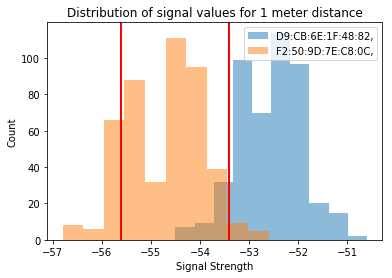

In [6]:
for badge in signal_strength_1m:
    badge.plot(kind='hist', alpha=0.5)
plt.xlabel('Signal Strength')
plt.ylabel('Count')
plt.title('Distribution of signal values for 1 meter distance')
plt.legend(macs, loc='upper right')

[out_90, in_90] = getThresholds(0.9, [signal_strength_1m[0], signal_strength_1m[1]])
plt.axvline(x=out_90, linewidth=2.0, color='r')
plt.axvline(x=in_90, linewidth=2.0, color='r')
# D9 is outside the case and F2 is inside ... menttion on the graph

In [7]:
def getDistance(rssi, n, a):
    return 10**((a-rssi)/(10*n))

### Compare the obtained constants against experiment conducted with multiple badges
### Combine signal distribution from multiple badge experiment as follows:
### Focus only on the 2 badges facing front in the top two levels (4 badges in total)
### Combine the data from 3 badges outside the case and treat the one outside the case separately
### Plot the distribution for the two groups of badges from the experiment and the function for distance using both these constants

In [8]:
multibadge_file_path = '../data/rssi_distance/expt6/expt_07_11_'

raw_data = []

for i in xrange(2,9,2):
    raw_data.append(pd.read_csv(multibadge_file_path+str(i)+'f.dat', header=None, sep=' ', skiprows=1, skipfooter=1, parse_dates=True, names=['MAC', 'RSSI', 'TIME']))
    
macs = [['F2:50:9D:7E:C8:0C,'],  ['D9:CB:6E:1F:48:82,', 'CD:A3:F0:C5:68:73,', 'D2:67:85:48:D5:EF,']]


/home/orenled/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


/home/orenled/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=4,window=5,center=False).mean()
  """


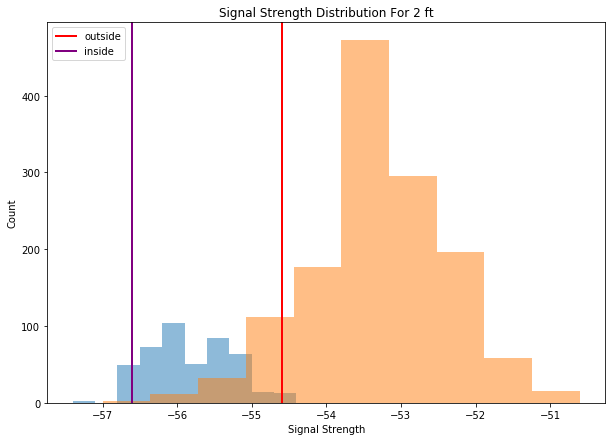

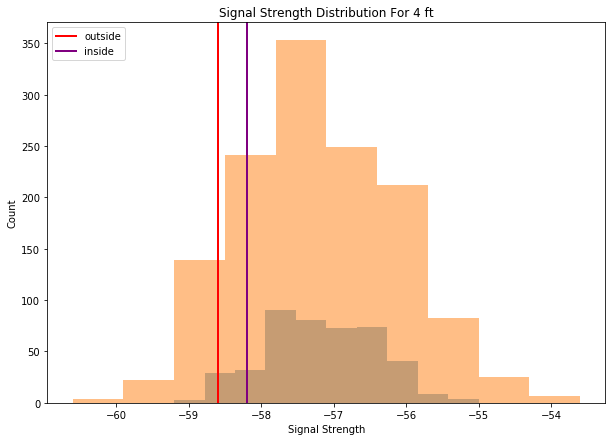

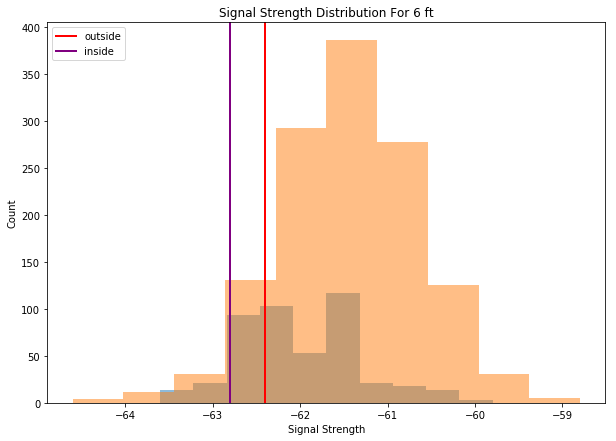

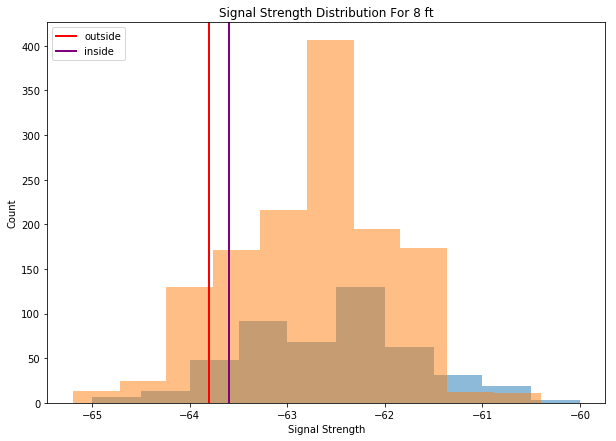

In [9]:
for i,distance in enumerate(raw_data):
    vals = []
    for mac in macs:
        temp = distance[distance['MAC'].isin(mac)]['RSSI']
        vals.append(pd.rolling_mean(temp, 5, min_periods=4))
    
    [inside, outside] = getThresholds(0.9, [vals[0], vals[1]])
    plt.figure(figsize=(10,7))
    
    for j,val in enumerate(vals):
        val.plot(kind='hist', alpha=0.5)
    
    plt.xlabel('Signal Strength')
    plt.ylabel('Count')
    plt.title('Signal Strength Distribution For ' + str(2*(i+1)) + ' ft')
    plt.axvline(x=outside, linewidth=2.0, color='r', label='outside')
    plt.axvline(x=inside, linewidth=2.0, color='purple', label='inside')
      
    plt.legend(['outside', 'inside'], loc='upper left')

In [10]:
signal_level = range(-70,-50)
[outside, inside] = getThresholds(0.9, [signal_strength_1m[0], signal_strength_1m[1]])
distances = [[getDistance(level, 2.4, A)*3.33 for level in signal_level] for A in [outside, inside]]

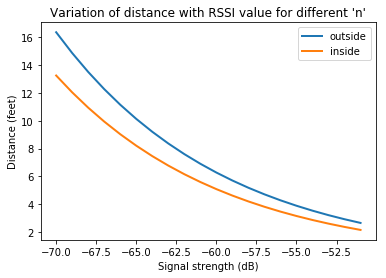

In [11]:
for i in xrange(len(distances)):
    plt.plot(signal_level, distances[i], linewidth=2.0)
plt.xlabel('Signal strength (dB)')
plt.ylabel('Distance (feet)')
plt.title("Variation of distance with RSSI value for different 'n'")
plt.legend(['outside', 'inside'], loc='upper right')

/home/orenled/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=4,window=5,center=False).mean()
  


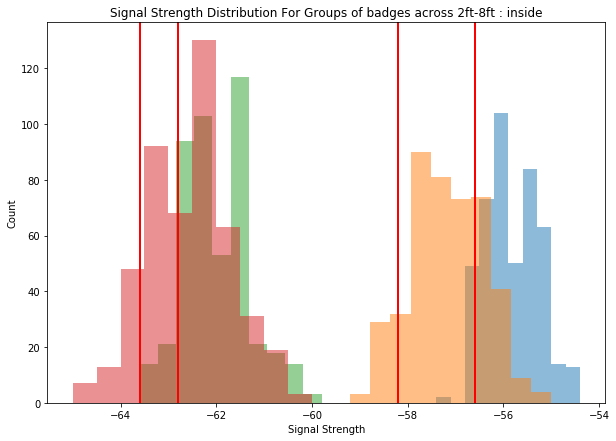

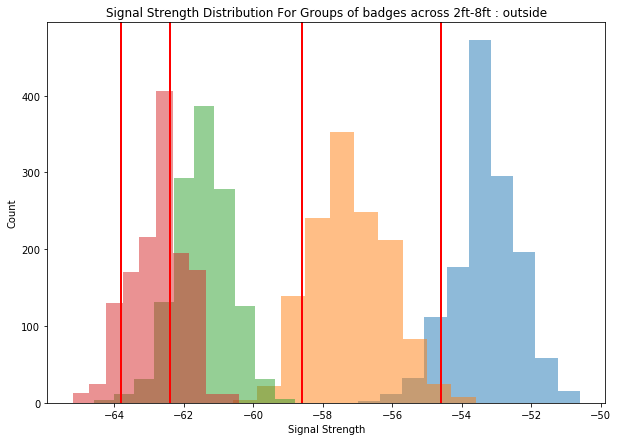

In [12]:
labels = ['inside', 'outside']
for i,mac in enumerate(macs):
    vals = []
    for distance in raw_data:
        temp = distance[distance['MAC'].isin(mac)]['RSSI']
        vals.append(pd.rolling_mean(temp, 5, min_periods=4))
    
    thresholds = getThresholds(0.9, vals)
    plt.figure(figsize=(10,7))
    
    for j,val in enumerate(vals):
        val.plot(kind='hist', alpha=0.5)
        plt.axvline(x=thresholds[j], linewidth=2.0, color='red')
        
    plt.xlabel('Signal Strength')
    plt.ylabel('Count')
    plt.title('Signal Strength Distribution For Groups of badges across 2ft-8ft : ' + labels[i])
        

## Analysis for experiment with all badges inside the case and the receiver outside the case

In [13]:
cased_badges_file_path = '../data/rssi_distance/expt7/expt_07_29_'

raw_data = []

for i in xrange(2,11,2):
    raw_data.append(pd.read_csv(cased_badges_file_path+str(i)+'f.dat', header=None, sep=' ', skiprows=1, skipfooter=1, parse_dates=True, names=['MAC', 'RSSI', 'TIME']))

/home/orenled/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


/home/orenled/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=4,window=5,center=False).mean()
  after removing the cwd from sys.path.


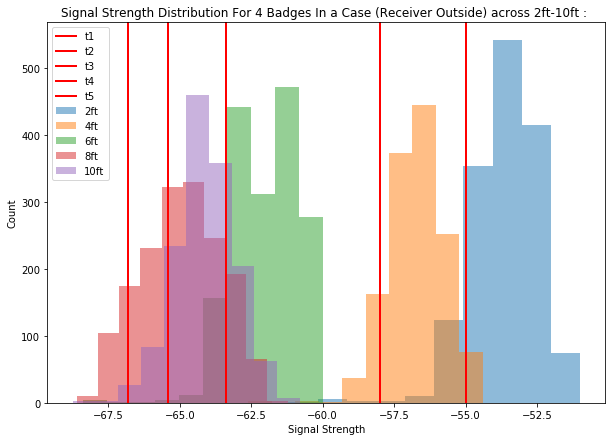

In [14]:
vals = []
for i,distance in enumerate(raw_data):
    temp = distance['RSSI']
    vals.append(pd.rolling_mean(temp, 5, min_periods=4))
    
thresholds = getThresholds(0.9, vals)
plt.figure(figsize=(10,7))

for j,val in enumerate(vals):
    val.plot(kind='hist', alpha=0.5)
    plt.axvline(x=thresholds[j], linewidth=2.0, color='red', label=str(j))

plt.xlabel('Signal Strength')
plt.ylabel('Count')
plt.title('Signal Strength Distribution For 4 Badges In a Case (Receiver Outside) across 2ft-10ft : ')
plt.legend(['t1', 't2', 't3', 't4', 't5','2ft', '4ft', '6ft', '8ft', '10ft'], loc='upper left')

## Analysis For Badges and Receiver Inside the Case

In [15]:
receiver_inside_file_path = '../data/rssi_distance/expt8/expt_07_29_'

raw_data = []

for i in xrange(2,11,2):
    raw_data.append(pd.read_csv(receiver_inside_file_path+str(i)+'f.dat', header=None, sep=' ', skiprows=1, skipfooter=1, parse_dates=True, names=['MAC', 'RSSI', 'TIME']))

/home/orenled/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


/home/orenled/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=4,window=5,center=False).mean()
  after removing the cwd from sys.path.


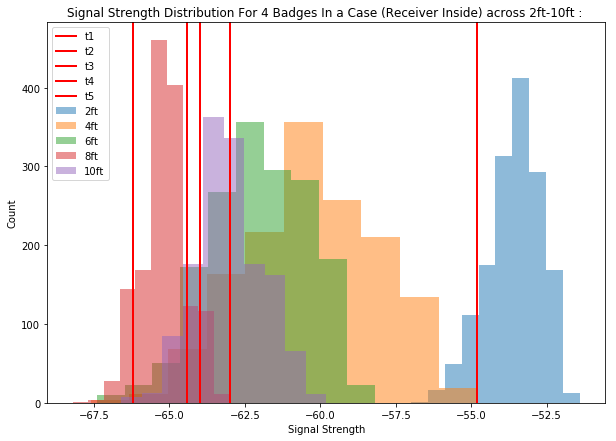

In [16]:
vals = []
for i,distance in enumerate(raw_data):
    temp = distance['RSSI']
    vals.append(pd.rolling_mean(temp, 5, min_periods=4))
    
thresholds = getThresholds(0.9, vals)
plt.figure(figsize=(10,7))

for j,val in enumerate(vals):
    val.plot(kind='hist', alpha=0.5)
    plt.axvline(x=thresholds[j], linewidth=2.0, color='red', label=str(j))

plt.xlabel('Signal Strength')
plt.ylabel('Count')
plt.title('Signal Strength Distribution For 4 Badges In a Case (Receiver Inside) across 2ft-10ft : ')
plt.legend(['t1', 't2', 't3', 't4', 't5','2ft', '4ft', '6ft', '8ft', '10ft'], loc='upper left')